# Capstone Two - Health Insurance Data

Look into different features to observe the relationship based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

## Overview 

Columns:

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: number of children covered by health insurance / number of dependents
* smoker: smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: individual medical costs billed by health insurance

### Step1: Import dataset into a Jupyter Notebook 

In [1]:
import pandas as pd
df= pd.read_excel(r'C:\Users\marik\OneDrive\Desktop\Springboard Projects\Unit 16\insurance.xlsx',header=0)
print(df.head())
print(df.columns)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### Step2: Data Cleansing

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.ticker as mtick

In [3]:
# Converting text to numbers to calulate correlations.
'''
After you run this code, re-running will cause the error. convert to numbers to check correlation
'''
df['sex'].replace(['male','female'],[0,1],inplace=True)
df['smoker'].replace(['no','yes'],[0,1],inplace=True)
df['region'].replace(['southwest','southeast','northwest','northeast'],[1,2,3,4],inplace=True)
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       1  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520


In [8]:
# Check if conversion (to numbers) are done correctly.
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [9]:
# converting back numbmers to text so easier to see when it's showing as label
df = df.assign(gender = np.where(df['sex']==1, 'female', 'male'))
df = df.assign(smoker_txt = np.where(df['smoker']==1, 'yes', 'no'))
print(df.head())

   age  sex     bmi  children  smoker  region      charges  gender smoker_txt  \
0   19    1  27.900         0       1       1  16884.92400  female        yes   
1   18    0  33.770         1       0       2   1725.55230    male         no   
2   28    0  33.000         3       0       2   4449.46200    male         no   
3   33    0  22.705         0       0       3  21984.47061    male         no   
4   32    0  28.880         0       0       3   3866.85520    male         no   

  region_name  
0   southwest  
1   southeast  
2   southeast  
3   northwest  
4   northwest  


In [10]:
# Converting back to text to show in plot
def region_name(x):
    if x == 1: 
        return 'southwest'
    elif x == 2:
        return 'southeast'
    elif x == 3:
        return 'northwest'
    else: 
        return 'northeast'

df['region_name'] = df.region.apply(region_name)

df['region_name'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region_name, dtype: int64

In [11]:
df['gender'].value_counts() # Count per variables in column
df['gender'].value_counts(normalize=True)  # How to check %

male      0.505232
female    0.494768
Name: gender, dtype: float64

In [46]:
# filter data by smoker = yes
smoker_yes = df.loc[df['smoker_txt']=='yes']
print(smoker_yes.head())

# filter data by smoker = no
smoker_no = df.loc[df['smoker_txt']=='no']
print(smoker_no.head())

    age  sex    bmi  children  smoker  region     charges  gender smoker_txt  \
0    19    1  27.90         0       1       1  16884.9240  female        yes   
11   62    1  26.29         0       1       2  27808.7251  female        yes   
14   27    0  42.13         0       1       2  39611.7577    male        yes   
19   30    0  35.30         0       1       1  36837.4670    male        yes   
23   34    1  31.92         1       1       4  37701.8768  female        yes   

   region_name agerange bmi_category  
0    southwest    18-29   Overweight  
11   southeast      60+   Overweight  
14   southeast    18-29        Obese  
19   southwest    30-39        Obese  
23   northeast    30-39        Obese  
   age  sex     bmi  children  smoker  region      charges  gender smoker_txt  \
1   18    0  33.770         1       0       2   1725.55230    male         no   
2   28    0  33.000         3       0       2   4449.46200    male         no   
3   33    0  22.705         0       0     

In [13]:
# Creating age groups
def age_buckets(x):
    if x < 30: 
        return '18-29'
    elif x < 40:
        return '30-39'
    elif x < 50:
        return '40-49'
    elif x < 60: 
        return '50-59'
    else:
        return '60+'

df['agerange'] = df.age.apply(age_buckets)
df['agerange'].value_counts()

18-29    417
40-49    279
50-59    271
30-39    257
60+      114
Name: agerange, dtype: int64

In [14]:
# Creating bmi groups
def bmi_category(x):
    if x < 18.500: 
        return 'Underweight'
    elif x < 25.000:
        return 'Healthy Weight'
    elif x < 30.000:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df.bmi.apply(bmi_category)
df['bmi_category'].value_counts()

Obese             707
Overweight        386
Healthy Weight    225
Underweight        20
Name: bmi_category, dtype: int64

In [ ]:
# Creating group by charge

---------------------------------------------------------------------------

# Correlation
* More correlation to Smokers.

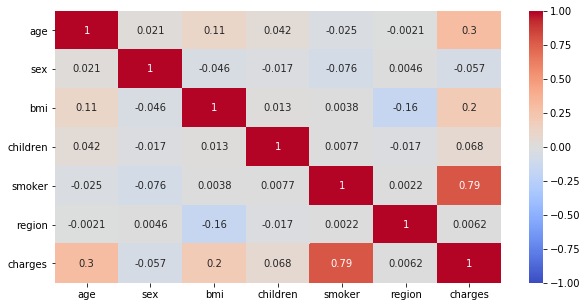

In [16]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

---------------------------------------------------------------------------

# Data Visualization

## Distribusion of Charges

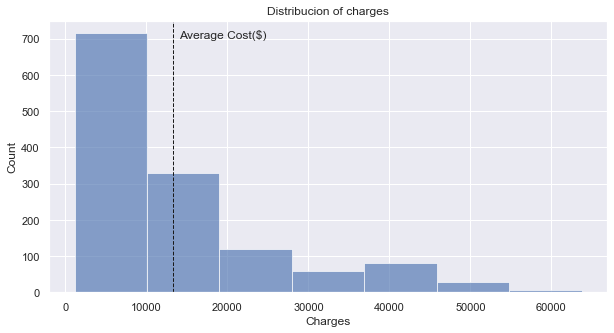

In [17]:
sns.set(style="darkgrid")

x = df['charges']
plt.hist(x, bins=7, alpha=0.65)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(x=14000, y=700, s='Average Cost($)')
plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribucion of charges')
plt.show()

## Age
* Minimum cost gets higher as age gets older.

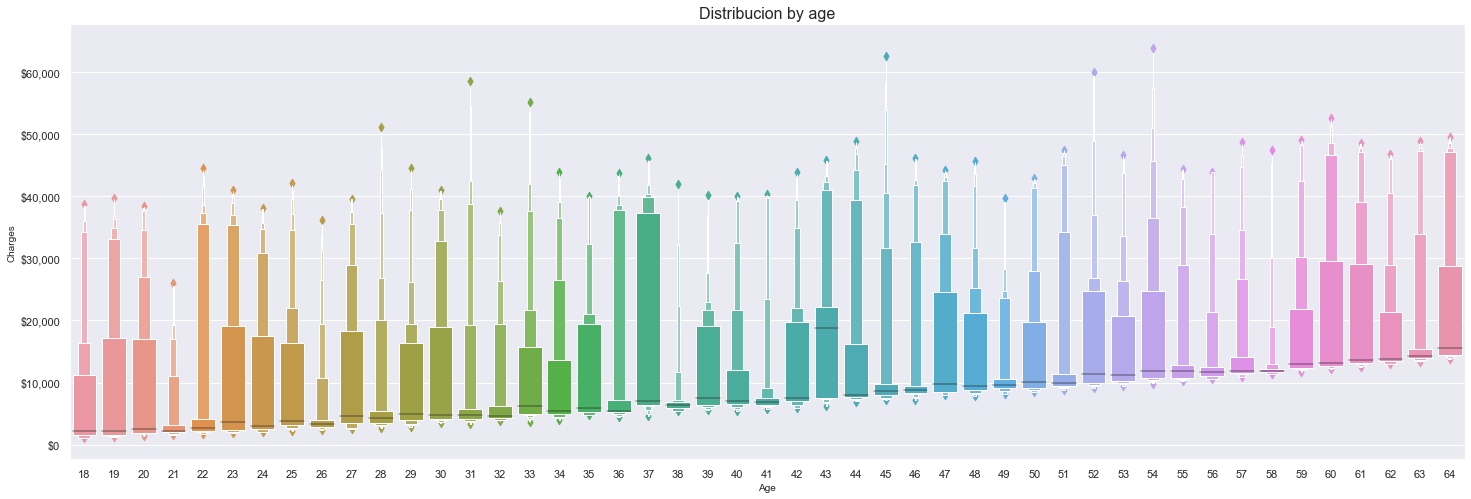

In [26]:
sns.set(style="darkgrid")
ax = sns.boxenplot(x = 'age', y = 'charges', data = df)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (25,8)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Charges', fontsize = 10)
plt.title('Distribucion by age' , fontsize = 16)
plt.show()

* Compare smoker and age. In any age range, smoker patietns spend much more than non-smoker.

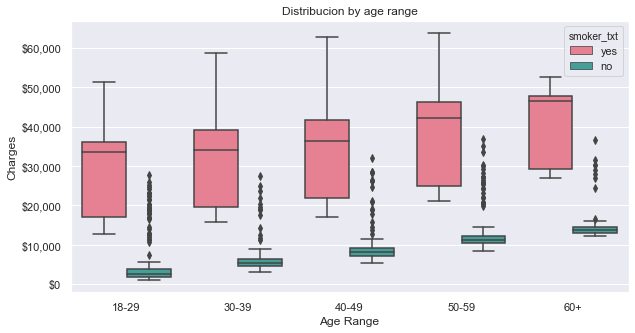

In [28]:
sns.set(style="darkgrid")
ax = sns.boxplot (x='agerange', y = 'charges', hue='smoker_txt', data = df, palette="husl")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
df['agerange'] = pd.Categorical(df['agerange'], ["18-29", "30-39", "40-49","50-59","60+"])
df.sort_values("agerange")

plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Age Range')
plt.ylabel('Charges')
plt.title('Distribucion by age range')
plt.show()

* Smoker shows two clusters, where non-smokers shows spending more when gets older.  Non-smoker outlier could be due to accident, other health condition etc. Need to research if there is any trend.

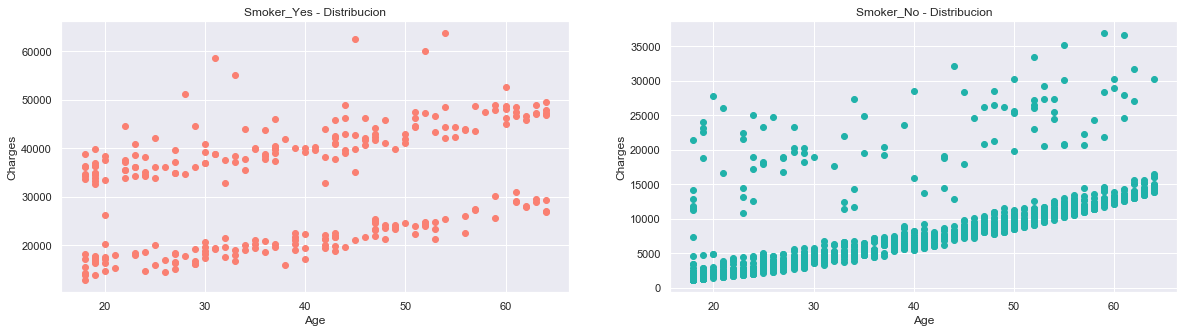

In [29]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (20,5)

plt.subplot(1, 2, 1)
x= smoker_yes['age']
y= smoker_yes['charges']
plt.scatter (x,y, color ='salmon')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Smoker_Yes - Distribucion')

plt.subplot(1, 2, 2)
x= smoker_no['age']
y= smoker_no['charges']
plt.scatter (x,y, color ='lightseagreen')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Smoker_No - Distribucion')

plt.show()

In [75]:
# Why Smoker_No group has outliers? What is the trend? 
#average_by_age = round(smoker_no.groupby(['age'])['charges'].mean(),2)

Q1 = smoker_no.quantile(0.25)
Q3 = smoker_no.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

print(upper_bound)

age            89.875000
sex             2.500000
bmi            46.602500
children        5.000000
smoker          0.000000
region          6.000000
charges     22427.559575
dtype: float64


# Gender
* There is no price difference per gender.

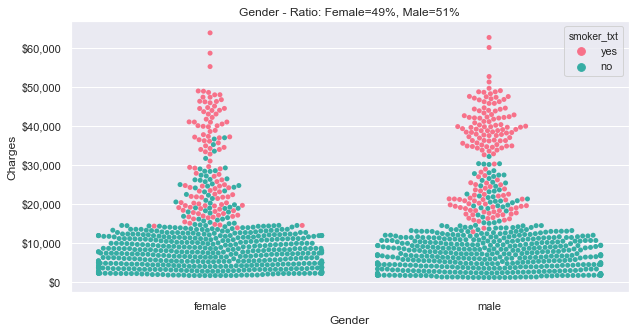

In [51]:
sns.set(style="darkgrid")
ax = sns.swarmplot(x=df['gender'], y=df['charges'], hue=df['smoker_txt'], palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('legend',fontsize='medium')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender - Ratio: Female=49%, Male=51%')
plt.show()

## BMI
* Similar BMI distribution across the age regardless of total counts.

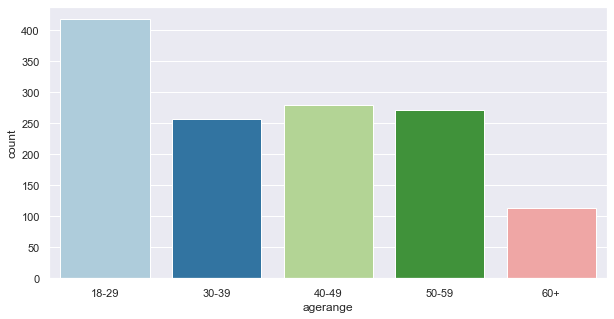

In [120]:
sns.set(style="darkgrid",palette="Paired")
ax = sns.countplot(x="agerange", data=df)
df['agerange'] = pd.Categorical(df['agerange'], ["18-29", "30-39", "40-49","50-59","60+"])
df.sort_values("agerange")
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

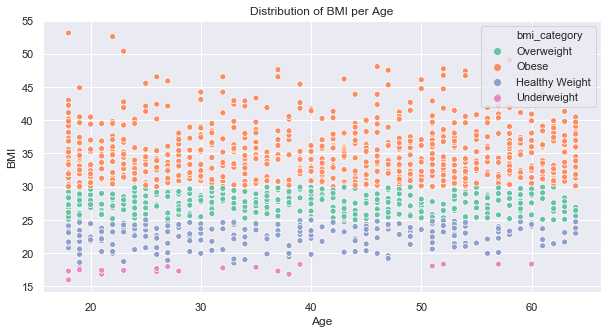

In [106]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['bmi_category'], palette="Set2")

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('legend',fontsize='medium')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Distribution of BMI per Age')
plt.show()

* When BMI exceeds 30, smoker spend a lot more. Two clusters are made by BMI.

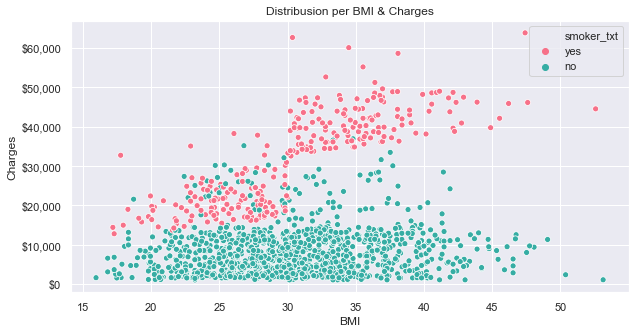

In [134]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker_txt'], palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.rc('legend',fontsize='medium')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Distribusion per BMI & Charges')
plt.show()

* When comparing BMI per smoking status, Smoker & Obese combination became much more costly than other groups.
* On the other hand, Non-Smoker group does not show same trend.

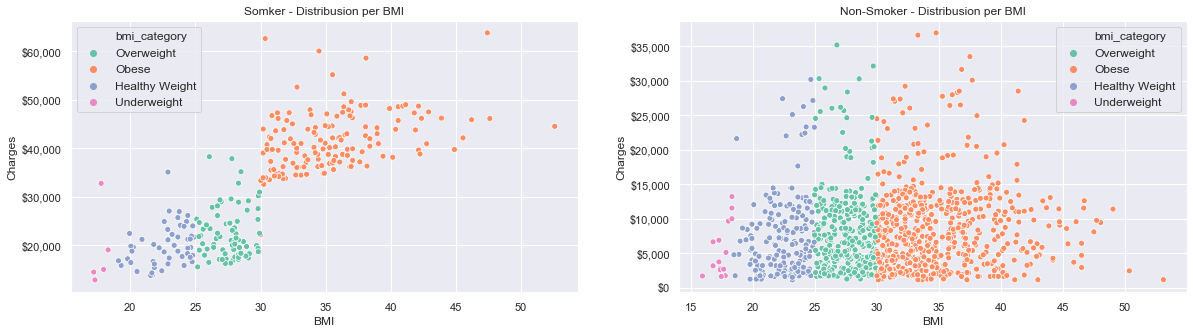

In [107]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (20,5)
plt.rc('legend',fontsize='medium')

plt.subplot(1, 2, 1)
ax = sns.scatterplot(x=smoker_yes['bmi'], y=smoker_yes['charges'], hue=df['bmi_category'], palette="Set2")
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Somker - Distribusion per BMI')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.subplot(1, 2, 2)
ax = sns.scatterplot(x=smoker_no['bmi'], y=smoker_no['charges'], hue=df['bmi_category'], palette="Set2")
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Non-Smoker - Distribusion per BMI')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.show()

## Region
* Similar distribusion accross region

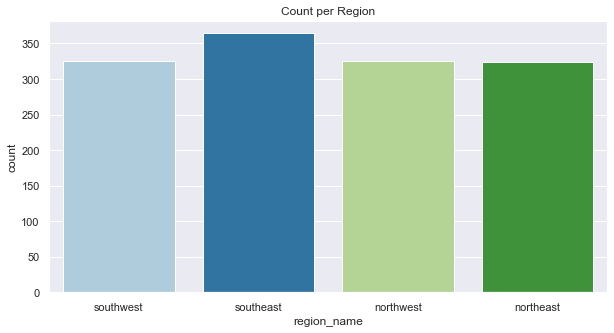

In [111]:
# Count smoker per region
# want to change from boxplot to stucked column bar chart --> need to research

sns.set(style="darkgrid",palette="Paired")
ax = sns.countplot(x="region_name", data=df)
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Count per Region')
plt.show()

* Smokers pay higher charges across the Region.  NO matter where the patients locate, smokers spend higher amount for the treatments.

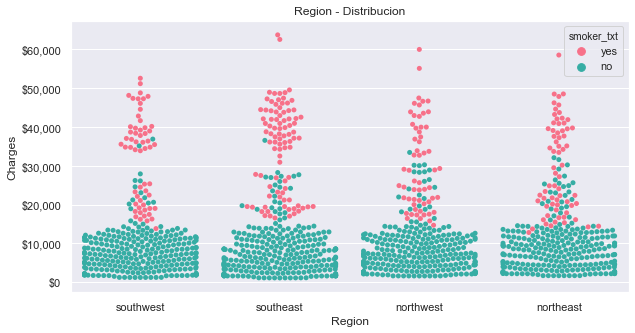

In [49]:
sns.set(style="darkgrid")
ax = sns.swarmplot (x='region_name', y = 'charges', hue='smoker_txt', data = df, palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region - Distribucion')
plt.show()

## Childlen
* Smokers pays more and number of child seems affecting the spending towards healthcare since minimum is higher than zero.

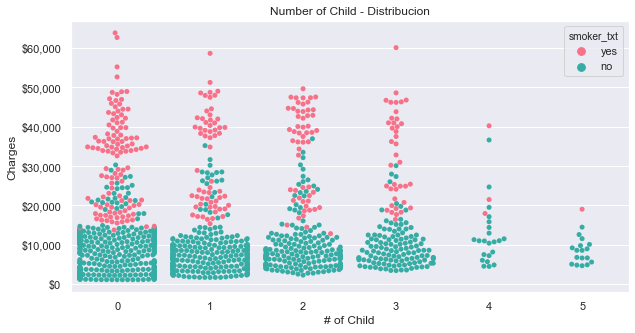

In [112]:
sns.set(style="darkgrid")
ax = sns.swarmplot (x='children', y = 'charges', hue='smoker_txt', data = df, palette="husl")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('# of Child')
plt.ylabel('Charges')
plt.title('Number of Child - Distribucion')
plt.show()

* Except the group who has 5 children, spending amount is higher and higher.

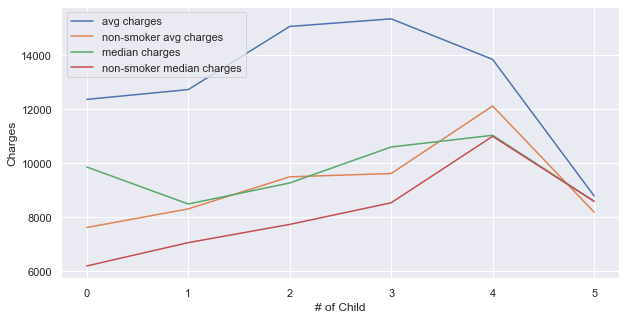

In [144]:
average_total_numchild = round(df.groupby(['children'])['charges'].mean(),2)
average_nonsmoker_numchild = round(smoker_no.groupby(['children'])['charges'].mean(),2)
median_total_numchild = round(df.groupby(['children'])['charges'].median(),2)
median_nonsmoker_numchild = round(smoker_no.groupby(['children'])['charges'].median(),2)

plt.rcParams['figure.figsize'] = (10,5)
plt.plot(average_total_numchild, label = 'avg charges')
plt.plot(average_nonsmoker_numchild, label = 'non-smoker avg charges')
plt.plot(median_total_numchild, label = 'median charges')
plt.plot(median_nonsmoker_numchild, label = 'non-smoker median charges')
plt.xlabel('# of Child')
plt.ylabel('Charges')
plt.legend(loc='best')

plt.show()

---------------------------------------------------------------------------

## Prediction

In [81]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

* R-squared is 0.751. Age, BMI, Number of Children, and Smoking shows that p-value is close to zero.

In [145]:
X = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']

X= sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:12:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.336e+04   1087.672    -12.284      0.000   -1.55e+04   -1.12e+04
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex          131.1106    332.811      0.394      0.694    -521.780     784.001
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region       353.6400    151.927      2.328      0.020      55.598     651.682
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         339.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
X = df[['age','bmi','smoker','children']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)
lm = LinearRegression()  
lm.fit(X_train,y_train)
print(lm.intercept_)


-12282.184867260858


In [133]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,260.801637
bmi,323.749750
smoker,22985.919896
children,518.655130


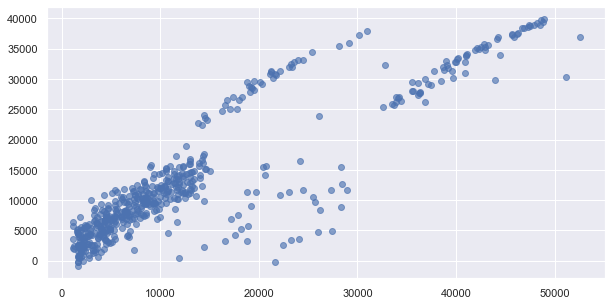

In [146]:
plt.figure(figsize=(10,5))
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions, alpha=0.65)
plt.show()

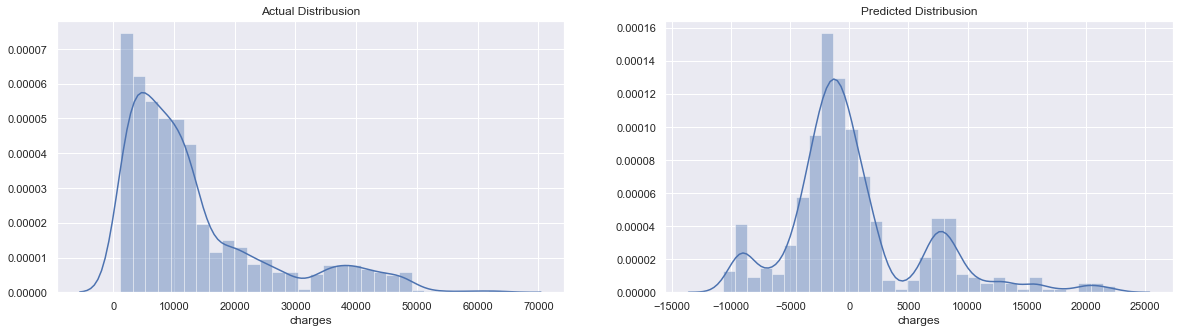

In [153]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.distplot(df['charges'])
plt.title('Actual Distribusion')

plt.subplot(1, 2, 2)
sns.distplot(y_test-predictions)
plt.title('Predicted Distribusion')

plt.show()

In [136]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4026.1550490667246
MSE: 32972500.66661121
RMSE: 5742.168637946052


-------------------------------------

## Insights